# Simple Linear regression
## objetives

After completing this lap, you will able to:

* Use scikit-learn to implement simple linear regression
* Create, train , and test a linear regression model on real data

In [2]:
### import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
The dataset you will use resides at the following url. You can use the url directly with the pandas library to load the datast.

In [3]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df=pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
206,2014,CHEVROLET,EQUINOX,SUV - SMALL,3.6,6,A6,E,18.8,13.1,16.2,17,259
363,2014,FORD,EXPLORER,SUV - STANDARD,2.0,4,A6,X,11.8,8.3,10.2,28,235
950,2014,SUBARU,IMPREZA AWD,COMPACT,2.5,4,M6,Z,14.2,10.4,12.5,23,288
121,2014,BMW,M6,COMPACT,4.4,8,M6,Z,16.2,10.9,13.8,20,317
582,2014,JEEP,COMPASS 4X4,SUV - SMALL,2.4,4,M5,X,10.3,8.4,9.4,30,216


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


You can see from the statistics here that 75% of the cars have a combined fuel consumption falling within a range of up to almost three times that of the most efficient car, with respective values of 31 MPG and 11 MPG. 

The highest fuel consumer at 60 MPG is suspiciously high but could be legitimate.

MODELYEAR has 0 standard deviation, and thus has no interesting information content.

#### Select features
Select a few features that might be indicative of CO2 emission to explore more.


In [5]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
297,3.6,6,11.2,258
810,1.6,4,8.3,191
676,3.5,6,8.2,189
425,3.5,6,14.3,229
780,1.6,4,7.8,179
70,4.0,8,13.9,320
650,3.0,6,12.3,283
1006,4.6,8,15.1,347
407,2.0,4,7.2,166


#### Visualize features
Consider the histograms for each of these features.

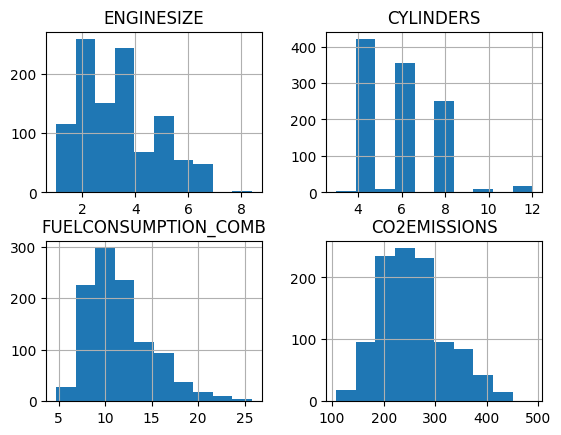

In [13]:
cdf.hist()
plt.show()

In [14]:
# extracting the 'ENGINESIZE' column and its histogram information
counts, bin_edges = np.histogram(cdf['ENGINESIZE'])
print("Counts in each bin:", counts)
print("Bin edges:", bin_edges)

Counts in each bin: [115 258 151 243  68 128  54  48   0   2]
Bin edges: [1.   1.74 2.48 3.22 3.96 4.7  5.44 6.18 6.92 7.66 8.4 ]



As you can see, most engines have 4, 6, or 8 cylinders, and engine sizes between 2 and 4 liters.  
As you might expect, combined fuel consumption and CO2 emission have very similar distributions.  
Go ahead and display some scatter plots of these features against the CO2 emissions, to see how linear their relationships are.



Text(0.5, 1.0, 'Engine size vs Emission')

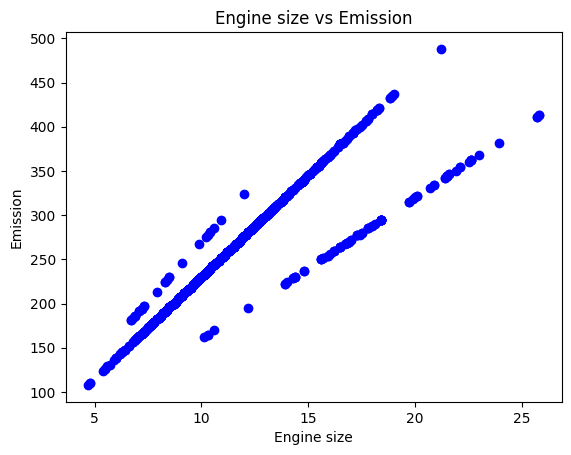

In [15]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Engine size vs Emission")